<a href="https://colab.research.google.com/github/os-angel/DiabetesDetection/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Motivation**

Predicting diabetes using a machine learning (ML) model is crucial because it can address several important issues:

**Early Detection:**

Identifying individuals at risk before they develop severe symptoms allows for early intervention and prevention.
Personalized Treatment: ML models can help tailor treatment plans based on individual patient characteristics.

**Cost Reduction:**

Early prevention and treatment can significantly reduce long-term healthcare costs.
Improved Quality of Life: Preventing severe complications enables patients to maintain a better quality of life.

**Resource Optimization:**

Healthcare systems can use resources more efficiently by focusing on high-risk patients.

## **Diabetes Prediction**

In this notebook, we are going to apply a Decision Tree Regressor in a real case of diabetes prediction. We are also going to apply some performance metrics and, above all, an exploratory analysis of the data.

To make the replication of this code faster and more efficient, we are going to use the data from the sklearn.datasets library and we are going to load it into the notebook

### **Importing Libraries and data description**
# Diabetes Dataset

Ten baseline variables, including age, sex, body mass index, average blood pressure, and six blood serum measurements, were obtained for each of (n = 442) diabetes patients. Additionally, the response of interest is a quantitative measure of disease progression one year after baseline.

## Data Set Characteristics:

- **Number of Instances**: 442
- **Number of Attributes**: The first 10 columns are numeric predictive values.
- **Target**: Column 11 represents a quantitative measure of disease progression one year after baseline.

## Attribute Information:

- **age**: age in years
- **sex**: gender (binary)
- **bmi**: body mass index
- **bp**: average blood pressure
- **s1**: tc, total serum cholesterol
- **s2**: ldl, low-density lipoproteins
- **s3**: hdl, high-density lipoproteins
- **s4**: tch, total cholesterol / HDL
- **s5**: ltg, possibly log of serum triglycerides level
- **s6**: glu, blood sugar level

**Note**: Each of these 10 feature variables has been mean-centered and scaled by the standard deviation times the square root of `n_samples` (i.e., the sum of squares of each column totals 1).

## Source URL:
[Diabetes Dataset](https://www.openml.org/d/37)

For more information, see: Bradley Efron, Trevor Hastie, Iain Johnstone, and Robert Tibshirani (2004) "Least Angle Regression," *Annals of Statistics* (with discussion), 407-499. [Least Angle Regression Paper](https://projecteuclid.org/euclid.aos/1084937628)


In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# load data
dataset = load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
### Create a dataset for ML aplication
import pandas as pd

### Select independent features
df_diabetes = pd.DataFrame(dataset.data, columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


##**Exploratory Dana Alaysis**
We will examine the distribution of the variables that make up the model, including age, BMI, and the other characteristics measured in diabetic patients.

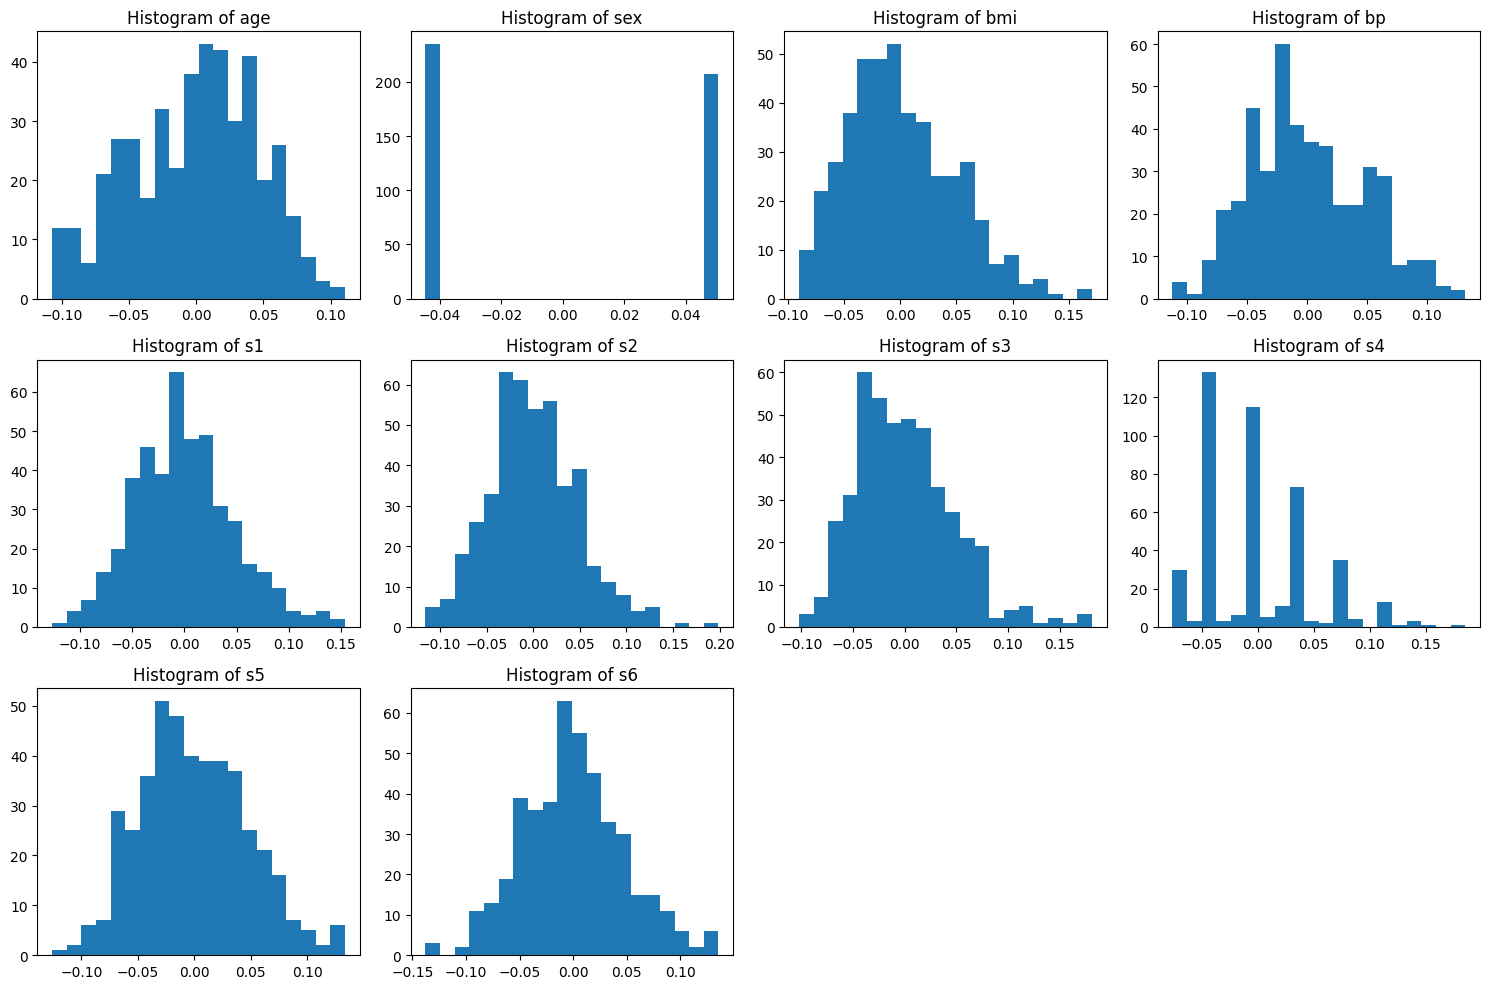

In [43]:

import matplotlib.pyplot as plt
# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the columns and create histograms
for i, col in enumerate(df_diabetes.columns):
    axes[i].hist(df_diabetes[col], bins=20)
    axes[i].set_title(f"Histogram of {col}")

# Remove empty subplots if the number of columns is not divisible by the number of rows
for i in range(len(df_diabetes.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [8]:
### Independet and dependent features
X = df_diabetes
y = dataset['target']


It is important to always split the data into training and testing sets, as this will help us later to measure the performance of the selected model.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


## **Interpretation of the Correlation Matrix**

The correlation matrix provides insights into the relationships between different variables in the dataset. Here are some key observations:

**Age:**

Shows moderate positive correlations with blood pressure (0.314) and blood sugar level (0.282). This suggests that as age increases, these variables tend to increase as well.


**Sex:**

Has a notable negative correlation with high-density lipoproteins (s3) (-0.355) and a positive correlation with total cholesterol/HDL ratio (s4) (0.320). This indicates that sex may influence these lipid measurements differently.


**BMI:** Exhibits strong positive correlations with average blood pressure (0.394), total cholesterol/HDL ratio (0.431), and blood sugar level (0.405).

Higher BMI is associated with higher values in these health indicators.


**Blood Pressure (bp):** Correlates positively with BMI (0.394), blood sugar level (0.375), and total cholesterol/HDL ratio (0.213). This suggests a link between blood pressure and these metabolic factors.
Serum Measurements (s1 to s6):

s1 (total serum cholesterol) and s2 (LDL) have a very high correlation (0.891), indicating they often increase together.
s3 (HDL) has a strong negative correlation with s4 (-0.737), suggesting that higher HDL is associated with a lower total cholesterol/HDL ratio.
s5 (possibly log of serum triglycerides) shows strong positive correlations with BMI (0.468) and blood sugar level (0.479), indicating these factors are related to triglyceride levels.

In [10]:
### Correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

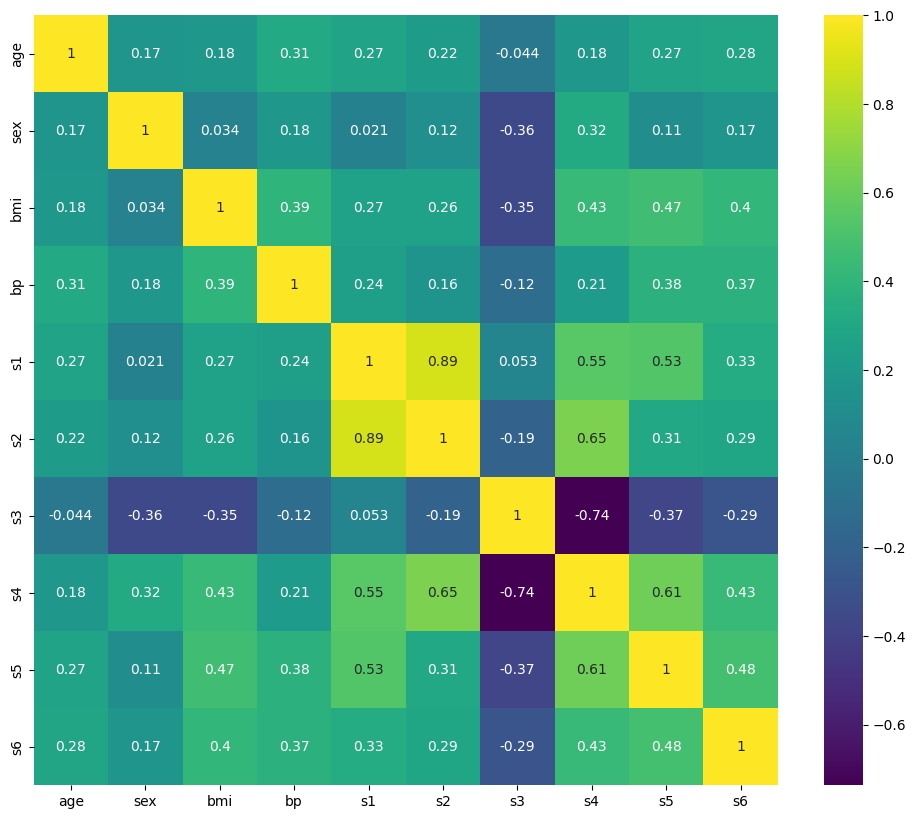

In [11]:
### Correlation with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='viridis')

## **Devision Tree Regressor**


This line imports the DecisionTreeRegressor class from the sklearn.tree module. This class is used to create a decision tree model for regression tasks.
Importing Evaluation Metrics:

This line imports three evaluation metrics from the sklearn.metrics module: mean_squared_error, r2_score, and mean_absolute_error. These metrics will be used to assess the performance of the regression model.
Creating the Regressor Instance:

This line creates an instance of the DecisionTreeRegressor class. The random_state=42 parameter is set to ensure that the results are reproducible by initializing the random number generator with a fixed seed.
Fitting the Model:

This line trains the decision tree regressor using the training data. The fit method takes two arguments: X_train (the training features) and y_train (the training target values). During this step, the model learns the relationship between the input features and the target variable.

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### **Hyperparameter Tuning**

### **Defining Hyperparameters for Grid Search:**

A dictionary named param is defined, containing various hyperparameters and their possible values for a decision tree regressor. These hyperparameters include:
Criterion:
Different functions to measure the quality of a split, such as mean squared error and mean absolute error.
Splitter: Strategies for splitting nodes, either choosing the best split or a random split.
Max Depth:
The maximum depth of the tree, with options ranging from specific values to no limit.
Min Samples Split:
The minimum number of samples required to split an internal node.
Min Samples Leaf:
The minimum number of samples required to be at a leaf node.
Max Features:
The number of features to consider when looking for the best split, with options like auto, sqrt, log2, or considering all features.

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
param = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[3,5,8,15,25,30,None],
    'min_samples_split':[2,5,7,12,20],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto','sqrt','log2',None]
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(regressor, param, cv=5, scoring = 'neg_mean_absolute_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 8, 15, 25, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 7, 12, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [36]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

##**Predictions**

In [37]:
y_pred = grid.predict(X_test)

In [38]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.28157923723055733
50.10721865525237
3806.3022204375534


## **NaivePredictions**

In [44]:
# Code for the best prediction and features

best_regressor = DecisionTreeRegressor(random_state=42)
best_regressor.fit(X_train, y_train)
y_pred_best = best_regressor.predict(X_test)

print(r2_score(y_test, y_pred_best))
print(mean_absolute_error(y_test, y_pred_best))
print(mean_squared_error(y_test, y_pred_best))

0.060653981041140725
54.52808988764045
4976.797752808989


## **Visualize Decision Tree**

[Text(0.6932338912699734, 0.9736842105263158, 'x[9] <= 0.034\nsquared_error = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.5219642039780293, 0.9210526315789473, 'x[3] <= 0.032\nsquared_error = 5003.295\nsamples = 271\nvalue = 137.982'),
 Text(0.6075990476240014, 0.9473684210526316, 'True  '),
 Text(0.38422467959387485, 0.868421052631579, 'x[8] <= -0.007\nsquared_error = 4178.644\nsamples = 215\nvalue = 125.949'),
 Text(0.23826044440745672, 0.8157894736842105, 'x[7] <= -0.02\nsquared_error = 2795.398\nsamples = 133\nvalue = 104.699'),
 Text(0.15694698735019974, 0.7631578947368421, 'x[1] <= 0.0\nsquared_error = 1974.792\nsamples = 95\nvalue = 95.137'),
 Text(0.07271554593874834, 0.7105263157894737, 'x[6] <= -0.018\nsquared_error = 2142.013\nsamples = 67\nvalue = 102.045'),
 Text(0.06738931424766978, 0.6578947368421053, 'x[2] <= -0.013\nsquared_error = 400.0\nsamples = 2\nvalue = 162.0'),
 Text(0.0647261984021305, 0.6052631578947368, 'squared_error = 0.0\nsamples = 1\nvalue = 142.0

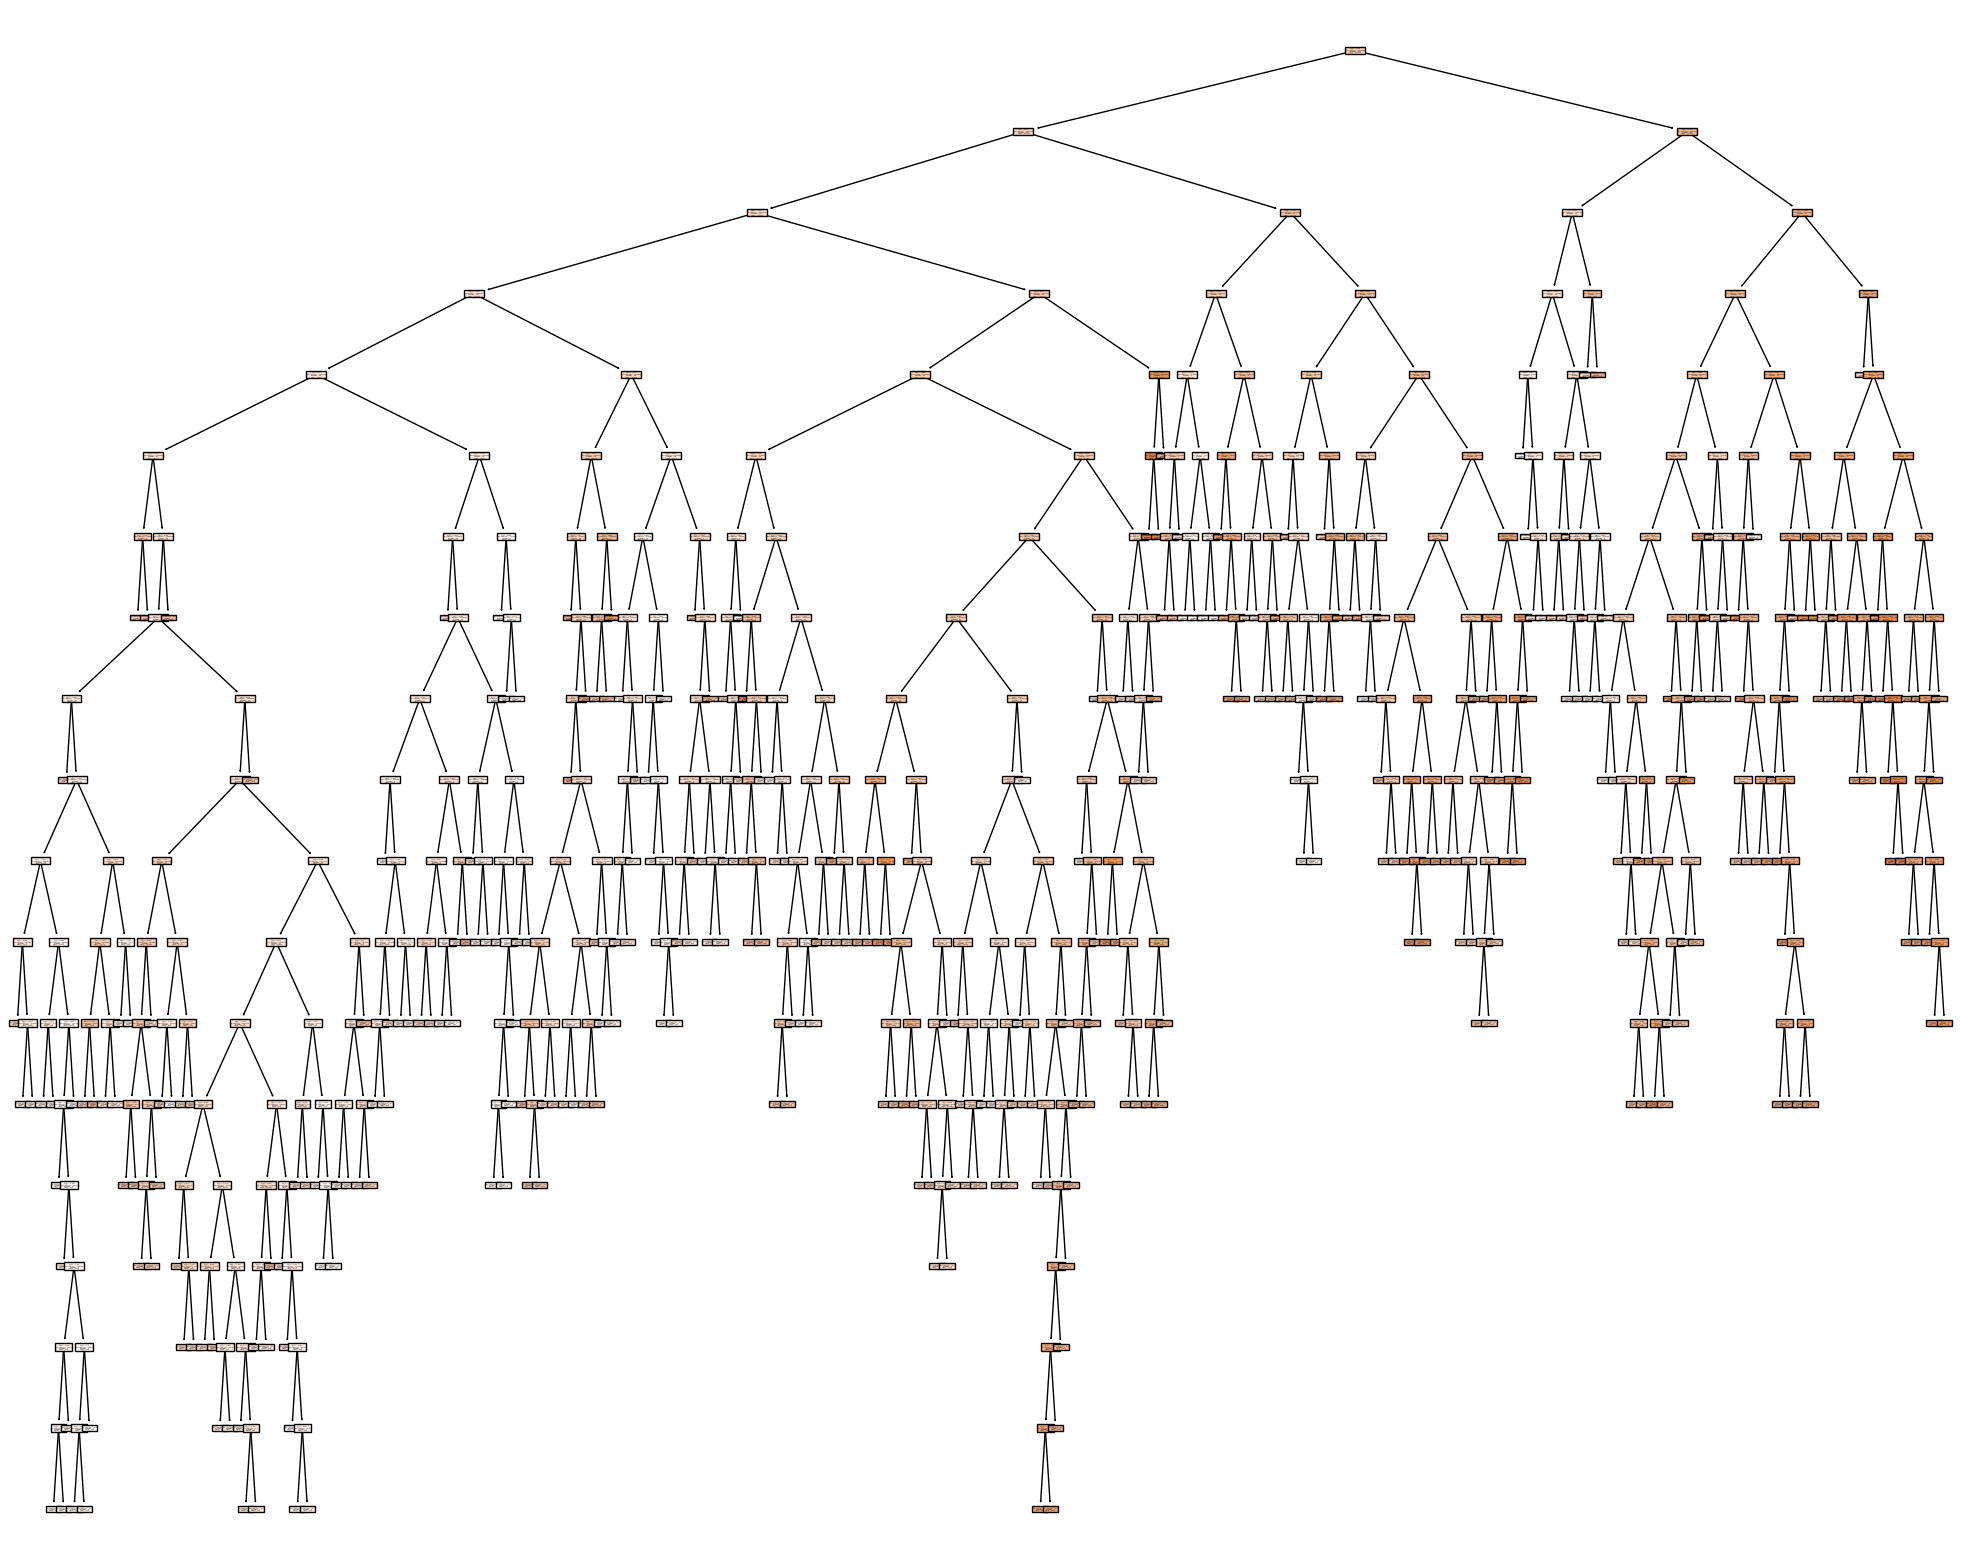

In [40]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(best_regressor, filled=True)

##**Conclusion**
The decision tree model, after hyperparameter optimization, showed an improvement in performance metrics compared to the initial model.
The R², MAE, and MSE metrics provide an indication of the model's accuracy in predicting the progression of diabetes.
The visualization of the tree allows understanding the decision rules learned by the model, showing the most important features for prediction.
While the obtained results offer a starting point, it is recommended to explore other models or machine learning techniques to determine if there are alternatives with higher accuracy or interpretability. Additionally, a deeper analysis of the model's residuals could reveal patterns not captured by the current model. Analysis using supervised ML tools usually has acceptable performance for this type of application.
